# Sentiment Analysis (SA) 

In [ ]:
# Needed libraries
import json            # to process JSON data
import calendar        # for calendar related functions
import spacy           # for Natural Language Processing of text corpora
from spacytextblob.spacytextblob import SpacyTextBlob  # sentiment analysis plugin for spaCy

import seaborn as sns  # for visualizations
import pandas as pd    # for data analysis and visualizations
import matplotlib.pyplot as plt  # for visualizations
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm  # to handle color mapping in plots
import numpy as np    # for scientific computing
import scipy          # for scientific computing
from scipy.stats import mannwhitneyu  # to perform the Mann-Whitney-U test
from scipy.stats import normaltest    # to test for normal distribution


### Calculating the SA values for each article and each month

In [18]:
"""
# Needed packages:
import os
import pandas as pd
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
"""

# Loading the spaCy model and adding the SpacyTextBlob pipeline for sentiment analysis
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

def analyze_sentiment(text):
    """
    Analyzes the sentiment of the provided text using spaCy and SpacyTextBlob.
    
    @param text: The text whose sentiment is to be analyzed.
    
    @return: A tuple containing the polarity and subjectivity of the text.
             Polarity indicates the emotional leaning with values from -1 to 1.
             Subjectivity indicates the personal opinion with values from 0 to 1.
    """
    
    doc = nlp(text)
    return doc._.polarity, doc._.subjectivity

def process_json(file_path, year, month):
    """
    Processes a single JSON file to analyze sentiments of abstracts, lead paragraphs, and headlines
    and computes average sentiment scores for the given month and year.
    
    @param file_path: The path to the JSON file to be processed.
    @param year: The year of the articles to help categorize the data.
    @type year: int
    @param month: The month of the articles to help categorize the data.
    @type month: int
    
    @return: A DataFrame with sentiment analysis results for each article and a dictionary with monthly averages.
    """
    
    df = pd.read_json(file_path)
    df_sa = df[['abstract', 'lead_paragraph', 'headline']].copy()
    df_sa['headline_main'] = df_sa['headline'].apply(lambda x: x['main'] if isinstance(x, dict) else x)
    df_sa = df_sa.fillna('')
    df_sa['abstract_polarity'], df_sa['abstract_subjectivity'] = zip(*df_sa['abstract'].apply(analyze_sentiment))
    df_sa['lead_paragraph_polarity'], df_sa['lead_paragraph_subjectivity'] = zip(*df_sa['lead_paragraph'].apply(analyze_sentiment))
    df_sa['headline_polarity'], df_sa['headline_subjectivity'] = zip(*df_sa['headline_main'].apply(analyze_sentiment))
    df_sa['year'] = year
    df_sa['month'] = month

    monthly_averages = {
        'year': year,
        'month': month,
        'abstract_polarity_avg': df_sa['abstract_polarity'].mean(),
        'abstract_subjectivity_avg': df_sa['abstract_subjectivity'].mean(),
        'lead_paragraph_polarity_avg': df_sa['lead_paragraph_polarity'].mean(),
        'lead_paragraph_subjectivity_avg': df_sa['lead_paragraph_subjectivity'].mean(),
        'headline_polarity_avg': df_sa['headline_polarity'].mean(),
        'headline_subjectivity_avg': df_sa['headline_subjectivity'].mean()
    }
    return df_sa, monthly_averages

def process_files_in_batches(articles_dir, output_avg_file, output_dir):
    """
    Processes files in batches, extracting and analyzing sentiments from JSON files stored in a directory.
    Results are saved for each article monthly as well as for monthly averages.

    @param articles_dir: Directory containing JSON files to process.
    @param output_avg_file: Path to the output CSV file where monthly average sentiment results will be saved.
    @param output_dir: Directory where monthly sentiment results for each article will be saved.
    
    """
    
    files = [f for f in os.listdir(articles_dir) if f.endswith('.json')]
    all_averages = []

    for file_name in files:
        file_path = os.path.join(articles_dir, file_name)
        parts = file_name.split('_') #splitting the json-file name (format: articles_YYYY_MM_YY.json) to extract year and month for categorization
        year = int(parts[1])
        month = int(parts[2].split('.')[0])

        df_sa, monthly_averages = process_json(file_path, year, month)
        all_averages.append(monthly_averages)

        output_file = os.path.join(output_dir, f'sa_results_{year}_{month:02d}.csv')
        df_sa.to_csv(output_file, index=False)
        print(f"Processed and saved: {file_name}")

    pd.DataFrame(all_averages).to_csv(output_avg_file, index=False)
    print(f"All monthly averages saved in: {output_avg_file}")

if __name__ == "__main__":
    cwd = os.getcwd()
    articles_dir = os.path.join(cwd, 'articles')
    output_avg_file = os.path.join(cwd, 'sa_results_monthly_averages.csv')
    output_dir = os.path.join(cwd, 'sa_results_single_articles_monthly')
    os.makedirs(output_dir, exist_ok=True)

    process_files_in_batches(articles_dir, output_avg_file, output_dir)


Processed and saved: articles_2008_05.json
Processed and saved: articles_2008_06.json
Processed and saved: articles_2008_07.json
Processed and saved: articles_2008_08.json
Processed and saved: articles_2008_09.json
Processed and saved: articles_2008_10.json
Processed and saved: articles_2008_11.json
Processed and saved: articles_2008_12.json
Processed and saved: articles_2009_01.json
Processed and saved: articles_2009_02.json
Processed and saved: articles_2009_03.json
Processed and saved: articles_2009_04.json
Processed and saved: articles_2012_05.json
Processed and saved: articles_2012_06.json
Processed and saved: articles_2012_07.json
Processed and saved: articles_2012_08.json
Processed and saved: articles_2012_09.json
Processed and saved: articles_2012_10.json
Processed and saved: articles_2012_11.json
Processed and saved: articles_2012_12.json
Processed and saved: articles_2013_01.json
Processed and saved: articles_2013_02.json
Processed and saved: articles_2013_03.json
Processed a

#### Displaying the structure of a csv-file of a single month after SA 

In [9]:
#import pandas as pd

#Path to the base directory in which the script is located
cwd = os.getcwd()
file_path = os.path.join(cwd, 'sa_results_single_articles_monthly', 'sa_results_2008_08.csv')

# reading the file
data_month = pd.read_csv(file_path)

# printing the head of the DataFrame
print(data_month.head())


                                            abstract  \
0  The passage of time softens perceptions of the...   
1  This is not the first time that Paris Hilton a...   
2  The Oregon incumbent’s commercial provides evi...   
3  President Bush has approved a revision of the ...   
4  House Republicans are staging a protest, stayi...   

                                      lead_paragraph  \
0  In her Web column today, Sheryl Gay Stolberg w...   
1  This is not the first time that Paris Hilton a...   
2  Yet another TV ad from Senator Gordon Smith, R...   
3  WASHINGTON  President Bush has approved a lon...   
4  You’ve got to love this. And forgive us, if we...   

                                            headline  \
0  {'main': 'The Political Revival of George Herb...   
1  {'main': 'Britney and Paris Mum on McCain Ad',...   
2  {'main': 'Another Smith Ad Links to Dems', 'ki...   
3  {'main': 'Bush Issues Order Seeking to Unite t...   
4  {'main': 'When the Lights Went Out', 'kicke

#### Displaying the structure of the csv-file with the monthly mean values of the SA 

In [10]:
#Path to the base directory in which the script is located
cwd = os.getcwd()
file_path = os.path.join(cwd, 'sa_results_monthly_averages.csv')

data = pd.read_csv(file_path)

print(data.head())

   year  month  abstract_polarity_avg  abstract_subjectivity_avg  \
0  2008      5               0.079107                   0.319198   
1  2008      6               0.059518                   0.326719   
2  2008      7               0.061967                   0.295290   
3  2008      8               0.065124                   0.334660   
4  2008      9               0.062657                   0.316633   

   lead_paragraph_polarity_avg  lead_paragraph_subjectivity_avg  \
0                     0.073293                         0.376822   
1                     0.071946                         0.364197   
2                     0.079471                         0.336859   
3                     0.070994                         0.365405   
4                     0.068841                         0.352143   

   headline_polarity_avg  headline_subjectivity_avg  
0               0.038706                   0.176703  
1               0.041642                   0.177192  
2               0.027947  

# Visualizations

### 1. Visualizing the amount of articles for each month by year

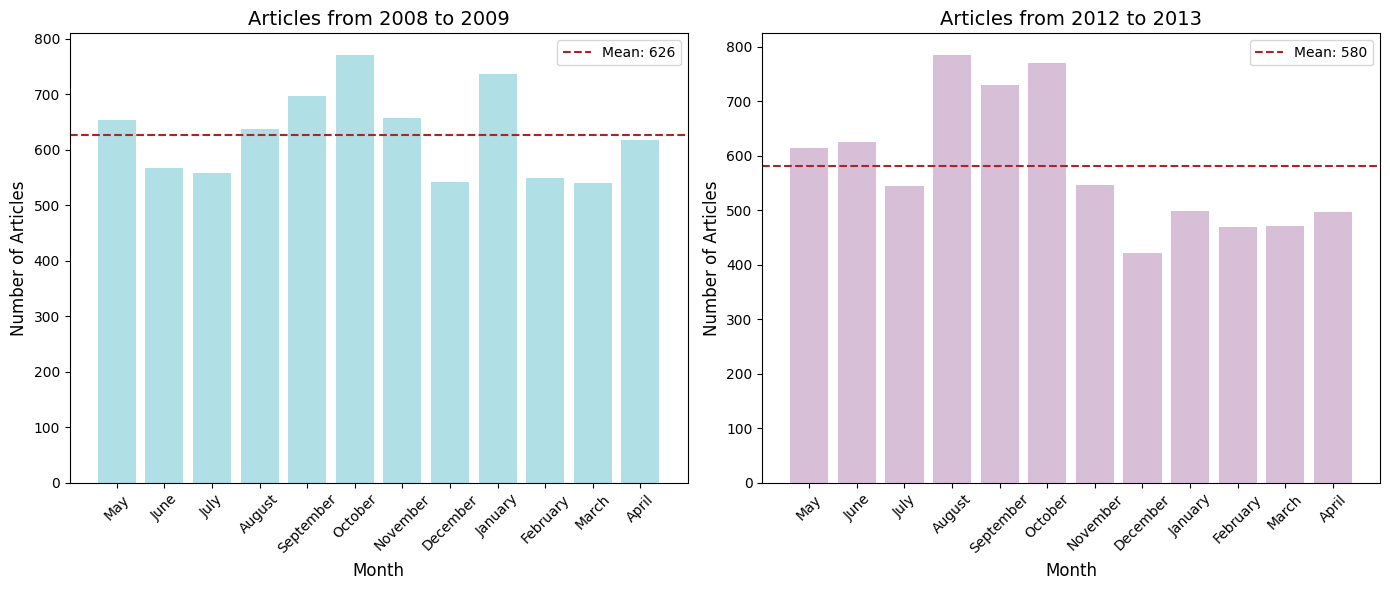

In [11]:
"""
# Needed packages:

import matplotlib.pyplot as plt
import pandas as pd
import os

"""

# Loading data
cwd = os.getcwd()
csv_file_path = os.path.join(cwd, 'article_counts.csv')
df = pd.read_csv(csv_file_path)

# Defining order of months (according to the defined period of election years for this study)
month_order = [5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4]
month_names = ['May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April']
month_to_name = {month: name for month, name in zip(month_order, month_names)}

# Assigning month names according to the defined order
df['MonthName'] = df['Month'].map(month_to_name)

# Creating a sort index for sorting months from May to April
month_to_sort_index = {month: i for i, month in enumerate(month_order)}
df['SortIndex'] = df['Month'].apply(lambda month: month_to_sort_index.get(month))

# Sorting the DataFrame by year and sort index
df = df.sort_values(by=['Year', 'SortIndex'])

# Sorting the DataFrame for the specified periods
df_2008_2009 = df[df['Year'].isin([2008, 2009])].sort_values(by='SortIndex')
df_2012_2013 = df[df['Year'].isin([2012, 2013])].sort_values(by='SortIndex')

# Separating data for visualization
df_2008 = df[df['Year'].isin([2008, 2009])]
df_2012 = df[df['Year'].isin([2012, 2013])]

# Creating subplot figures
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Calculating the mean for both years
mean_2008_2009 = int(df_2008['Article Count'].mean())
mean_2012_2013 = int(df_2012['Article Count'].mean())

# Plot for 2008-2009
axes[0].bar(df_2008['MonthName'], df_2008['Article Count'], color='powderblue')
axes[0].axhline(y=mean_2008_2009, color='firebrick', linestyle='--', label=f'Mean: {mean_2008_2009}')
axes[0].set_title('Articles from 2008 to 2009', fontsize=14)
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Number of Articles', fontsize=12)
axes[0].tick_params(axis='x', labelrotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)
axes[0].legend(loc='upper right')

# Plot for 2012-2013
axes[1].bar(df_2012['MonthName'], df_2012['Article Count'], color='thistle')
axes[1].axhline(y=mean_2012_2013, color='firebrick', linestyle='--', label=f'Mean: {mean_2012_2013}')
axes[1].set_title('Articles from 2012 to 2013', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Number of Articles', fontsize=12)
axes[1].tick_params(axis='x', labelrotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)
axes[1].legend(loc='upper right')

# Adjusting the layout to ensure there is no content overlap
plt.tight_layout()

# Creating a directory for figures if it does not already exist
figures_dir = os.path.join(cwd, 'figures')
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

# Saving the plot as a PNG file
plt.savefig(os.path.join(figures_dir, 'article_counts.png'))
plt.show()


###  Visualization of SA means

#### Bar chart for 2008/09

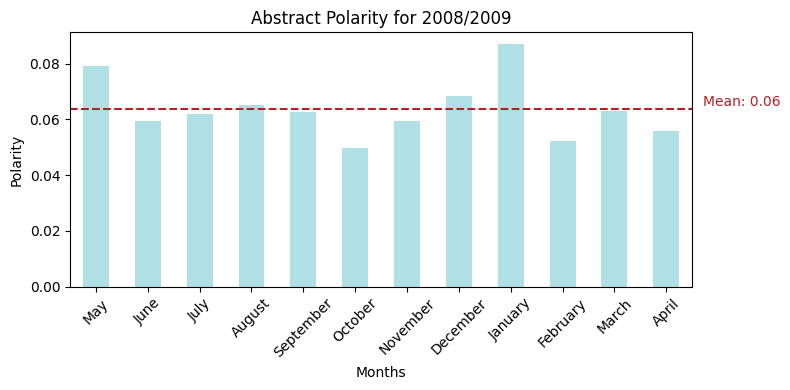

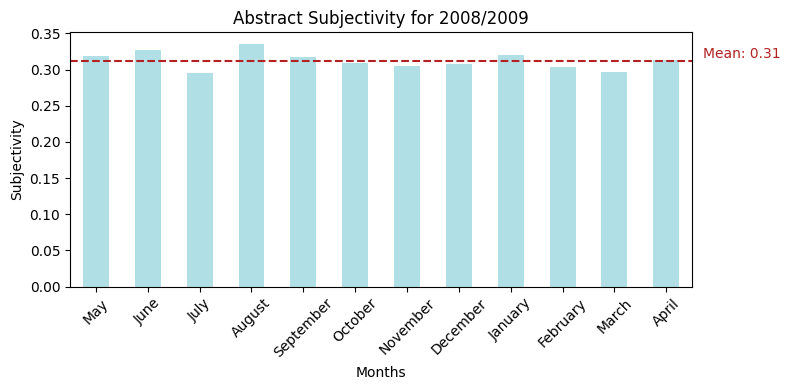

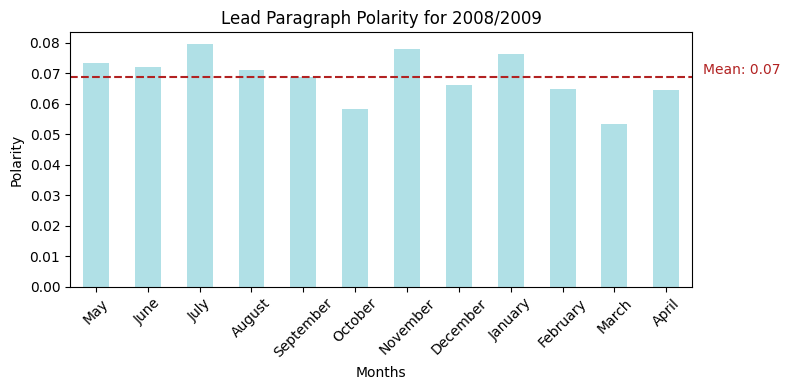

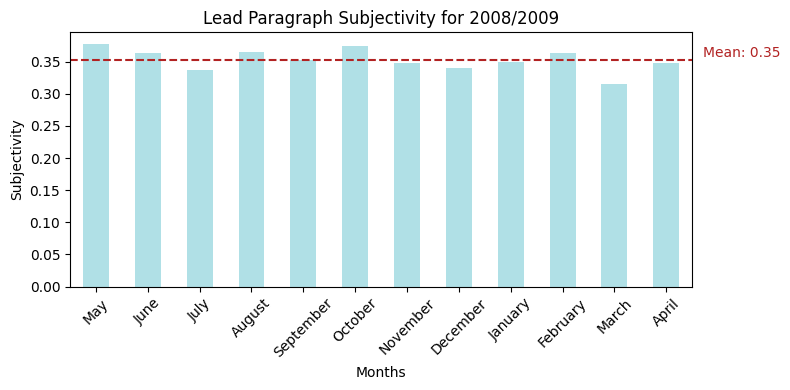

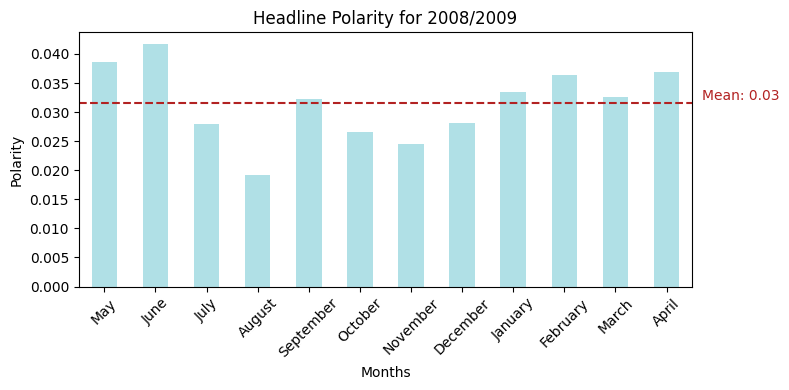

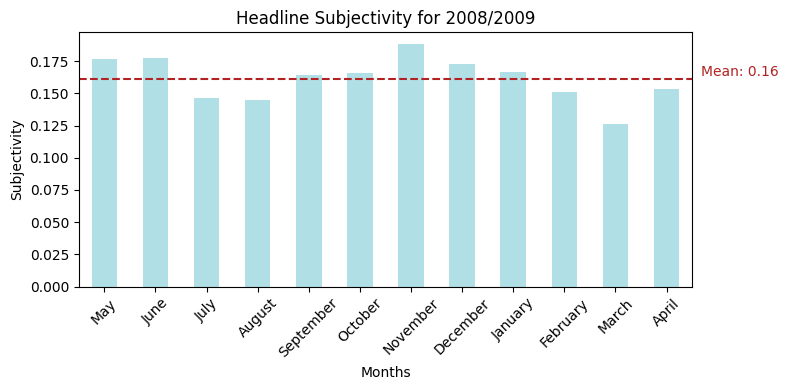

In [31]:
"""
# If not running the whole script in one session:

# Loading the DataFrame containing all monthly SA average values
file_path = os.path.join(os.getcwd(), 'sa_results_monthly_averages.csv')
data = pd.read_csv(file_path)
"""

"""
# Needed packages:

import os
import pandas as pd
import matplotlib.pyplot as plt
import calendar

"""

# Creating a directory for figures if it does not exist
figures_dir = os.path.join(os.getcwd(), 'figures')
os.makedirs(figures_dir, exist_ok=True)

# Creating a new DataFrame by filtering data for specific years
df_avg_2008 = data[(data['year'] == 2008) | (data['year'] == 2009)]

# Function to create a bar chart
def plot_bar_chart(data, column, title, ylabel, filename, figures_dir):
    """
    This function takes a given DataFrame and visualizes the data of the columns as a bar chart.
    @param data: DataFrame containing the data to plot
    @param column: Column name in DataFrame to plot
    @param title: Title of the bar chart
    @param ylabel: Label for the y-axis
    @param filename: Name of the file to save the plot
    @param figures_dir: Directory path to save the plots

    """
    # Defining the bar plot
    ax = data[column].plot(kind='bar', figsize=(8, 4), title=title, color='powderblue')
    mean_value = data[column].mean()
    plt.axhline(y=mean_value, color='firebrick', linestyle='--')
    plt.text(x=len(data)+1.2, y=mean_value, s=f'Mean: {mean_value:.2f}', verticalalignment='bottom', horizontalalignment='right', color='firebrick')
    plt.ylabel(ylabel)
    plt.xlabel('Months')

    # Converting month numbers to names using calendar method and using them for x-axis labels
    month_labels = [calendar.month_name[month] for month in data['month']]
    plt.xticks(ticks=range(len(data)), labels=month_labels, rotation=45)
    
    plt.tight_layout()
    plt.legend().set_visible(False)
    plt.savefig(os.path.join(figures_dir, filename))
    plt.show()

# Plotting bar charts for 2008 and 2009 and saving the results to the figures directory
plot_bar_chart(df_avg_2008, 'abstract_polarity_avg', 'Abstract Polarity for 2008/2009', 'Polarity', '2008_Abs_Pol_bar.png', figures_dir)
plot_bar_chart(df_avg_2008, 'abstract_subjectivity_avg', 'Abstract Subjectivity for 2008/2009', 'Subjectivity', '2008_Abs_Subj_bar.png', figures_dir)
plot_bar_chart(df_avg_2008, 'lead_paragraph_polarity_avg', 'Lead Paragraph Polarity for 2008/2009', 'Polarity', '2008_LP_Pol_bar.png', figures_dir)
plot_bar_chart(df_avg_2008, 'lead_paragraph_subjectivity_avg', 'Lead Paragraph Subjectivity for 2008/2009', 'Subjectivity', '2008_LP_Subj_bar.png', figures_dir)
plot_bar_chart(df_avg_2008, 'headline_polarity_avg', 'Headline Polarity for 2008/2009', 'Polarity', '2008_HL_Pol_bar.png', figures_dir)
plot_bar_chart(df_avg_2008, 'headline_subjectivity_avg', 'Headline Subjectivity for 2008/2009', 'Subjectivity', '2008_HL_Subj_bar.png', figures_dir)

# Saving df_avg_2008 to a CSV file in the current working directory for easy access regarding further analysis
csv_file_path = os.path.join(os.getcwd(), 'df_avg_2008.csv')
df_avg_2008.to_csv(csv_file_path, index=False)

#### Bar chart for 2012/13

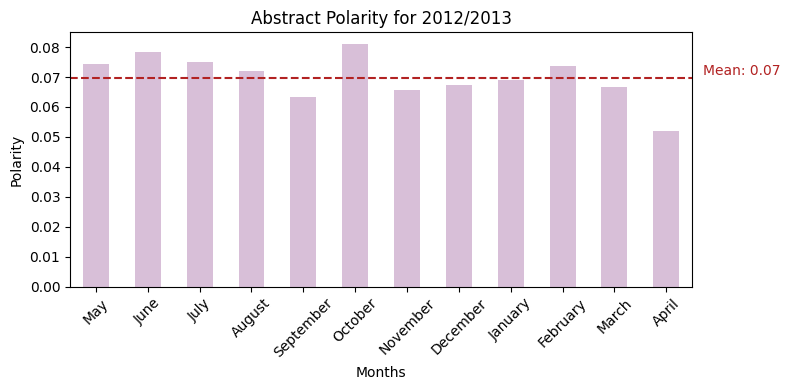

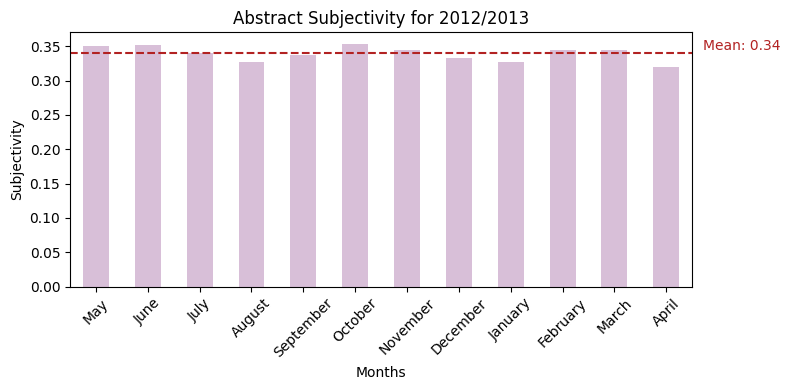

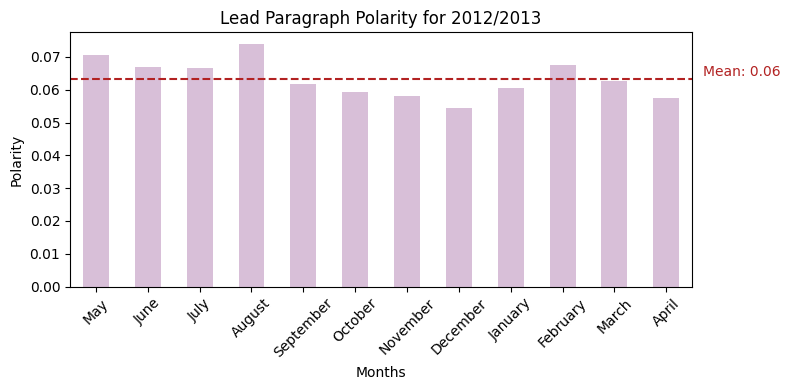

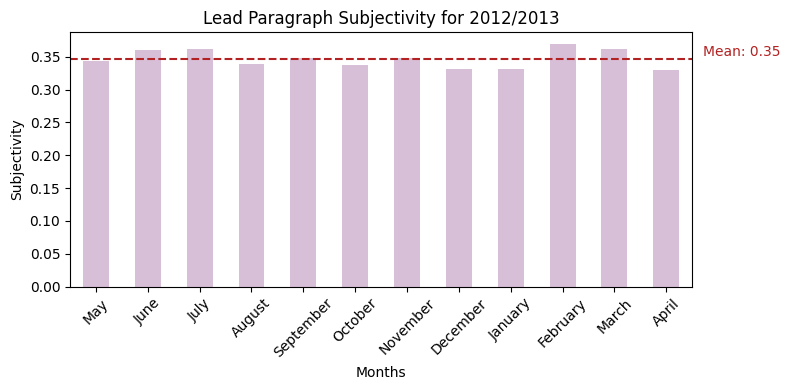

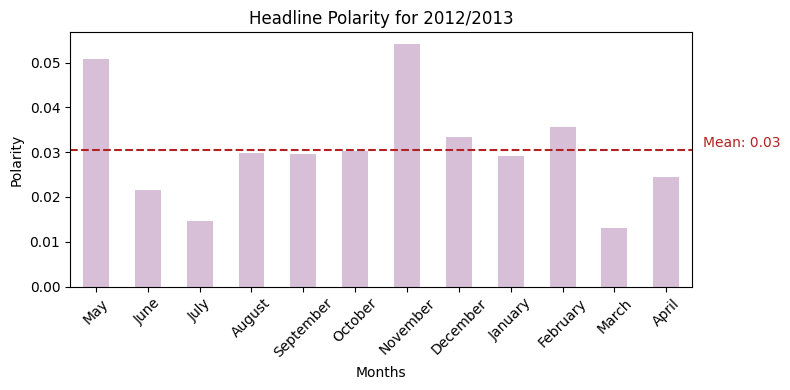

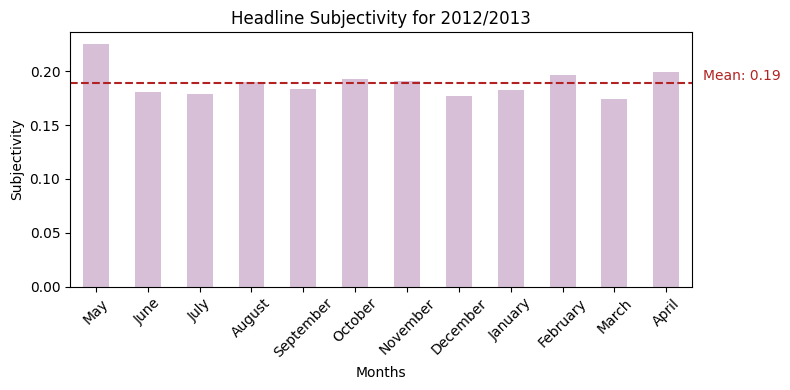

In [29]:
"""
# If not running the whole script in one session:

# Loading the DataFrame containing all monthly SA average values
file_path = os.path.join(os.getcwd(), 'sa_results_monthly_averages.csv')
data = pd.read_csv(file_path)
"""

# Filtering data for specific years
df_avg_2012 = data[(data['year'] == 2012) | (data['year'] == 2013)]

# Function to create a bar chart
def plot_bar_chart(data, column, title, ylabel, filename, figures_dir):

    # Defining the bar plot
    ax = data[column].plot(kind='bar', figsize=(8, 4), title=title, color='thistle')
    mean_value = data[column].mean()
    plt.axhline(y=mean_value, color='firebrick', linestyle='--')
    plt.text(x=len(data)+1.2, y=mean_value, s=f'Mean: {mean_value:.2f}', verticalalignment='bottom', horizontalalignment='right', color='firebrick')
    plt.ylabel(ylabel)
    plt.xlabel('Months')

    # Converting month numbers to names using calendar method and using them for x-axis labels
    month_labels = [calendar.month_name[month] for month in data['month']]
    plt.xticks(ticks=range(len(data)), labels=month_labels, rotation=45)
    
    plt.tight_layout()
    plt.legend().set_visible(False)
    plt.savefig(os.path.join(figures_dir, filename))
    plt.show()

# Plotting charts for 2012 and saving the results to the figures directory
plot_bar_chart(df_avg_2012, 'abstract_polarity_avg', 'Abstract Polarity for 2012/2013', 'Polarity', '2012_Abs_Pol_bar_mean.png', figures_dir)
plot_bar_chart(df_avg_2012, 'abstract_subjectivity_avg', 'Abstract Subjectivity for 2012/2013', 'Subjectivity', '2012_Abs_Subj_bar_mean.png', figures_dir)
plot_bar_chart(df_avg_2012, 'lead_paragraph_polarity_avg', 'Lead Paragraph Polarity for 2012/2013', 'Polarity', '2012_LP_Pol_bar_mean.png', figures_dir)
plot_bar_chart(df_avg_2012, 'lead_paragraph_subjectivity_avg', 'Lead Paragraph Subjectivity for 2012/2013', 'Subjectivity', '2012_LP_Subj_bar_mean.png', figures_dir)
plot_bar_chart(df_avg_2012, 'headline_polarity_avg', 'Headline Polarity for 2012/2013', 'Polarity', '2012_HL_Pol_bar_mean.png', figures_dir)
plot_bar_chart(df_avg_2012, 'headline_subjectivity_avg', 'Headline Subjectivity for 2012/2013', 'Subjectivity', '2012_HL_Subj_bar_mean.png', figures_dir)

# Saving df_2012 to a CSV file in the current working directory for easy access regarding further analysis
csv_file_path = os.path.join(os.getcwd(), 'df_avg_2012.csv')
df_avg_2012.to_csv(csv_file_path, index=False)

### Line charts: Comparing each parameter between the years

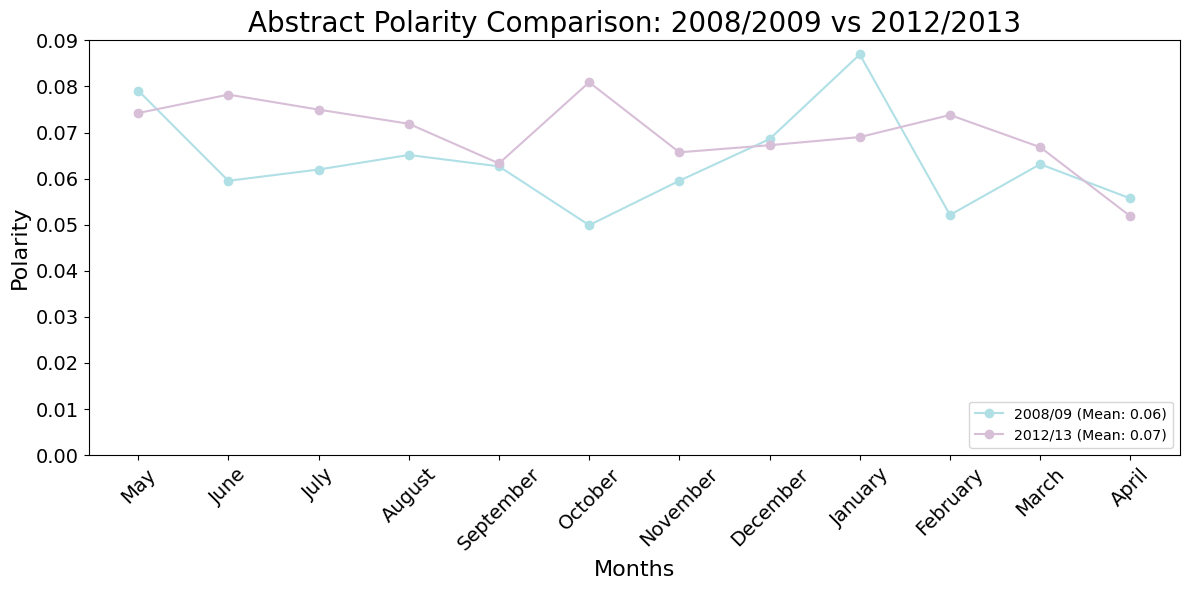

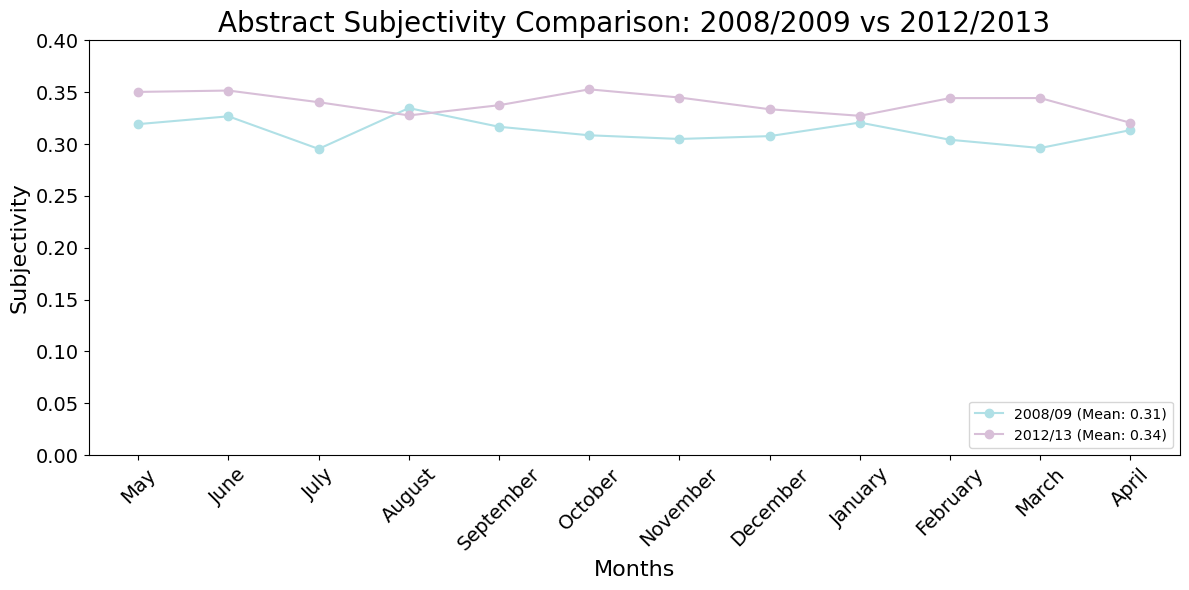

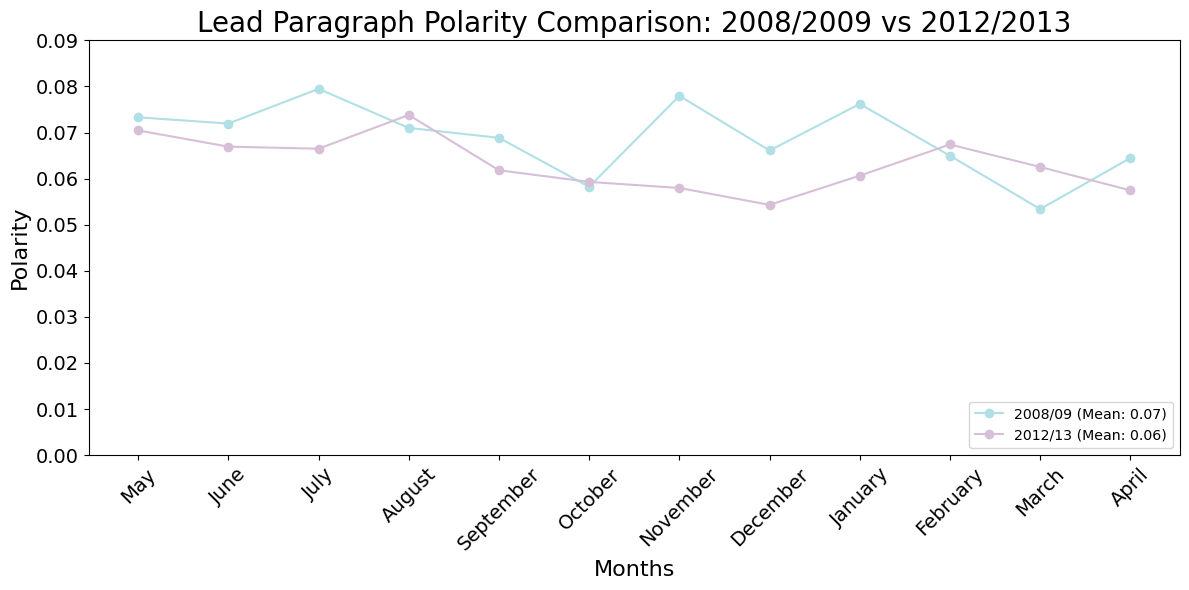

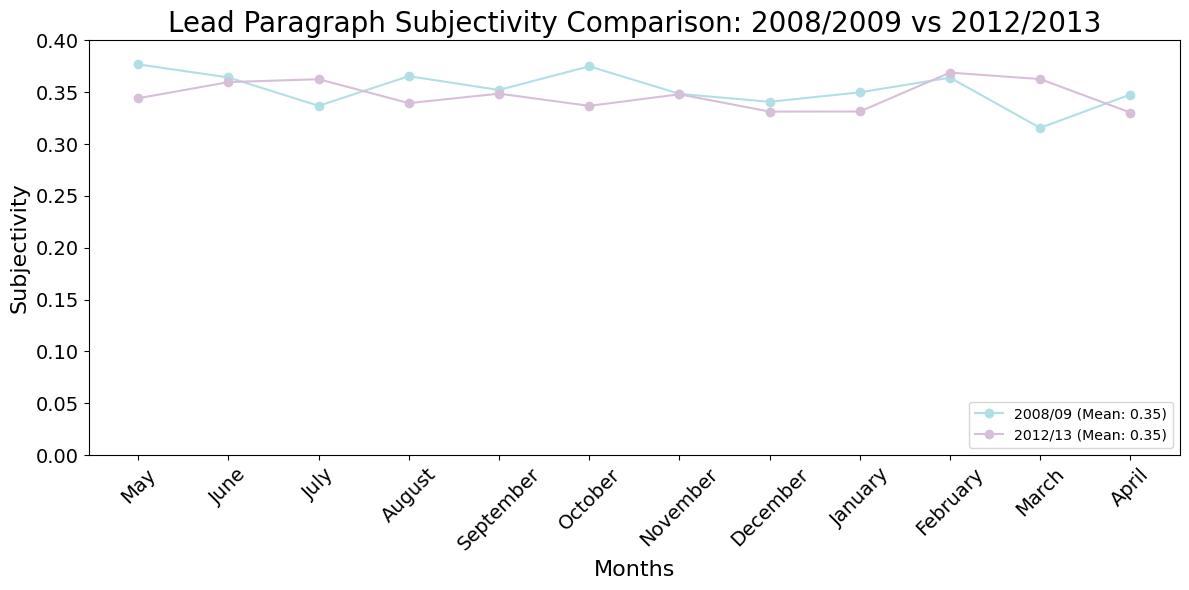

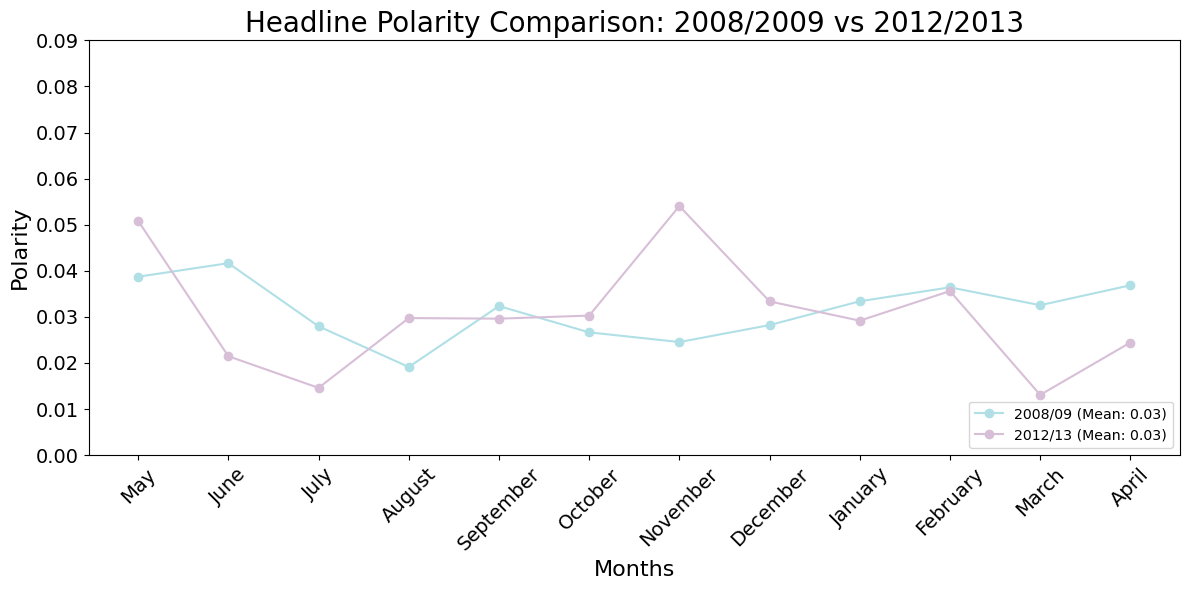

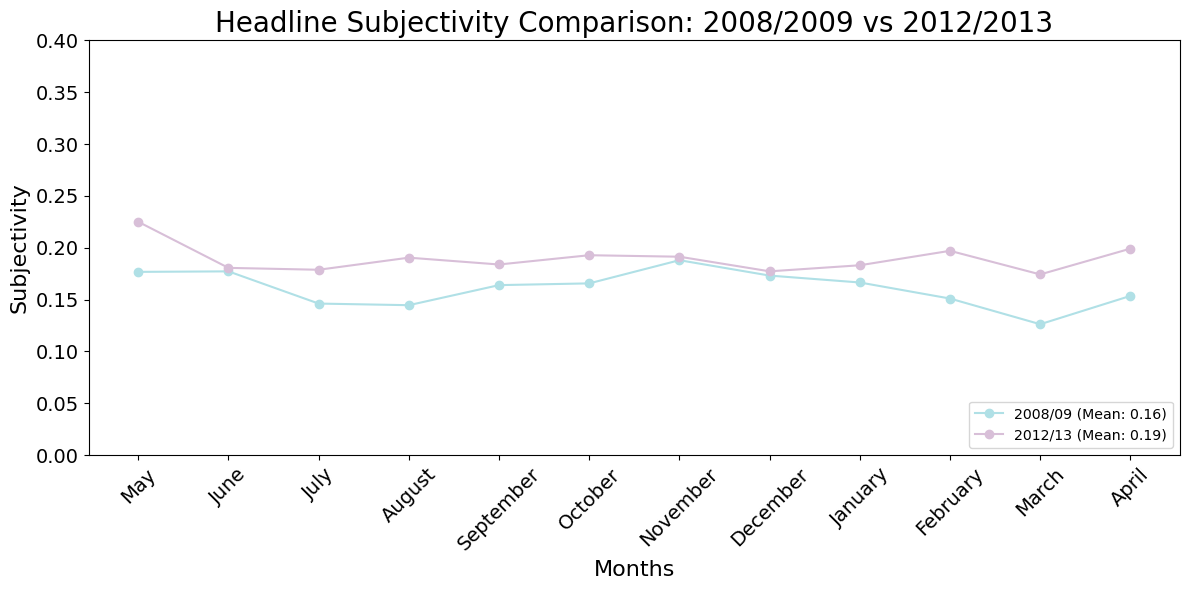

In [80]:
"""
# Needed packages:

import pandas as pd
import matplotlib.pyplot as plt
import calendar
import os

"""

# figures directory
figures_dir = os.path.join(os.getcwd(), 'figures')
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

# function to plot line charts for the SA data
def plot_line_chart(df1, df2, column, title, ylabel, filename, figures_dir, y_min, y_max, y_margin):
    """
    Plots a line chart comparing two datasets across specified parameters.

    @param df1: DataFrame for the first period (2008/09)
    @param df2: DataFrame for the second period (2012/13)
    @param column: The column name in the DataFrame to plot
    @param title: The title of the plot
    @param ylabel: The label for the y-axis
    @param filename: The filename to save the plot
    @param figures_dir: directory to save the figure
    @param y_min: minimum value for the y-axis
    @param y_max: maximum value for the y-axis
    @param y_margin: The margin to add above the y_max for better visualization
    """
    if column in df1.columns and column in df2.columns:
        plt.figure(figsize=(12, 6))
        custom_month_order = [5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4]  # Mai to April
        df1['month'] = pd.Categorical(df1['month'], categories=custom_month_order, ordered=True)
        df2['month'] = pd.Categorical(df2['month'], categories=custom_month_order, ordered=True)
        df1 = df1.sort_values('month')
        df2 = df2.sort_values('month')
        mean_08 = df1[column].mean()
        mean_12 = df2[column].mean()
        plt.plot(df1['month'].cat.codes, df1[column], label=f'2008/09 (Mean: {mean_08:.2f})', marker='o', color='powderblue')
        plt.plot(df2['month'].cat.codes, df2[column], label=f'2012/13 (Mean: {mean_12:.2f})', marker='o', color='thistle')
        month_labels = [calendar.month_name[m] for m in custom_month_order]
        plt.xticks(ticks=range(len(month_labels)), labels=month_labels, rotation=45, fontsize=14)
        plt.yticks(fontsize=14)
        plt.title(title, fontsize=20)
        plt.xlabel('Months', fontsize=16)
        plt.ylabel(ylabel, fontsize=16)
        plt.legend(loc='lower right', fontsize=10.2)
        plt.ylim(y_min, y_max + y_margin)
        plt.grid(False)
        plt.tight_layout()
        plt.savefig(os.path.join(figures_dir, filename))
        plt.show()
    else:
        print(f"Column '{column}' not found in one of the dataframes.")

# Reading the data
df_avg_2008 = pd.read_csv(os.path.join(os.getcwd(), 'df_avg_2008.csv'))
df_avg_2012 = pd.read_csv(os.path.join(os.getcwd(), 'df_avg_2012.csv'))

# Defining y-axis limits and margins
polarity_y_min, polarity_y_max, polarity_y_margin = 0, 0.08, 0.01
subjectivity_y_min, subjectivity_y_max, subjectivity_y_margin = 0, 0.35, 0.05

# Plotting charts for each sentiment analysis result
plot_line_chart(df_avg_2008, df_avg_2012, 'abstract_polarity_avg', 'Abstract Polarity Comparison: 2008/2009 vs 2012/2013', 'Polarity', 'Comparison_Abstract_Polarity_margin_mean.png', figures_dir, polarity_y_min, polarity_y_max, polarity_y_margin)
plot_line_chart(df_avg_2008, df_avg_2012, 'abstract_subjectivity_avg', 'Abstract Subjectivity Comparison: 2008/2009 vs 2012/2013', 'Subjectivity', 'Comparison_Abstract_Subjectivity_margin_mean.png', figures_dir, subjectivity_y_min, subjectivity_y_max, subjectivity_y_margin)
plot_line_chart(df_avg_2008, df_avg_2012, 'lead_paragraph_polarity_avg', 'Lead Paragraph Polarity Comparison: 2008/2009 vs 2012/2013', 'Polarity', 'Comparison_LP_Polarity_margin_mean.png', figures_dir, polarity_y_min, polarity_y_max, polarity_y_margin)
plot_line_chart(df_avg_2008, df_avg_2012, 'lead_paragraph_subjectivity_avg', 'Lead Paragraph Subjectivity Comparison: 2008/2009 vs 2012/2013', 'Subjectivity', 'Comparison_LP_Subjectivity_margin_mean.png', figures_dir, subjectivity_y_min, subjectivity_y_max, subjectivity_y_margin)
plot_line_chart(df_avg_2008, df_avg_2012, 'headline_polarity_avg', 'Headline Polarity Comparison: 2008/2009 vs 2012/2013', 'Polarity', 'Comparison_HL_Polarity_margin_mean.png', figures_dir, polarity_y_min, polarity_y_max, polarity_y_margin)
plot_line_chart(df_avg_2008, df_avg_2012, 'headline_subjectivity_avg', 'Headline Subjectivity Comparison: 2008/2009 vs 2012/2013', 'Subjectivity', 'Comparison_HL_Subjectivity_margin_mean.png', figures_dir, subjectivity_y_min, subjectivity_y_max, subjectivity_y_margin)


# Tests of significance for differences in SA values

As the significance tests are more valid with larger sample sizes, the analyses are not based on monthly averages but rather on datasets containing SA values from every single article.
For this reason two DataFrames and corresponding CSV files are created, containing all the relevant SA data for 2008/09 and for 2012/13 respectively.

### Merging all needed SA data for the two years

#### for 2008/09

In [16]:
# Merging the SA values of the months of 2008/09 containing the values of ALL individual items
directory_path = os.path.join(os.getcwd(), 'sa_results_single_articles_monthly')

# list to save the DataFrames
dfs_08 = []

# Running through the directory with the data containing the SA values of all items in a month
for filename in os.listdir(directory_path):
    if filename.startswith('sa_results_2008')or filename.startswith('sa_results_2009'):
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path)
        dfs_08.append(df)  # Adding the DataFrames to the list

# Combining all DataFrames of the selected period to one
df_2008 = pd.concat(dfs_08, ignore_index=True)

output_file_path = os.path.join(os.getcwd(), 'df_2008.csv')
df_2008.to_csv(output_file_path, index=False)

#print(df_2008.head())

#### for 2012/13

In [81]:
# Merging the SA values of the months of 2012/13 containing the values of ALL individual items
directory_path = os.path.join(os.getcwd(), 'sa_results_single_articles_monthly')

# list to save the DataFrames
dfs_12= []

# Running through the directory with the data containing the SA values of all items in a month
for filename in os.listdir(directory_path):
    if filename.startswith('sa_results_2012')or filename.startswith('sa_results_2013'):
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path)
        dfs_12.append(df)

# Combining all DataFrames of the selected period to one
df_2012 = pd.concat(dfs_12, ignore_index=True)

output_file_path = os.path.join(os.getcwd(), 'df_2012.csv')
df_2012.to_csv(output_file_path, index=False)

#print(df_2012.head())

## Testing for Normality

### D’Agostino’s K² Test

#### for 2008/09

In [18]:
"""
# If DataFrame is not already loaded:

file_path = os.path.join(os.getcwd(), 'df_2008.csv')
df_2008 = pd.read_csv(file_path)

"""

# importing scipy's normaltest which is based on D’Agostino’s K² test
from scipy.stats import normaltest

# List of sentiment parameters to test for normality
parameters = [
    'abstract_polarity',
    'abstract_subjectivity',
    'lead_paragraph_polarity',
    'lead_paragraph_subjectivity',
    'headline_polarity',
    'headline_subjectivity'
]

# Loop through each parameter and perform D’Agostino’s K² test
for param in parameters:
    data = df_2008[param]
    stat, p_value = normaltest(data)
    print(f"D’Agostino’s K² test for {param}: statistic = {stat}, p-value = {p_value}")
    
    # printing interpretation of the p-value
    if p_value < 0.05:
        print(f"The data for {param} do not follow a normal distribution.")
    else:
        print(f"No evidence against the assumption of normality for {param}.")

# RESULTS: NO normal distribution!

D’Agostino’s K² test for abstract_polarity: statistic = 665.3595149586391, p-value = 3.3038253854333874e-145
The data for abstract_polarity do not follow a normal distribution.
D’Agostino’s K² test for abstract_subjectivity: statistic = 442.3353519688033, p-value = 8.873577457370747e-97
The data for abstract_subjectivity do not follow a normal distribution.
D’Agostino’s K² test for lead_paragraph_polarity: statistic = 424.51570003918414, p-value = 6.570327170215675e-93
The data for lead_paragraph_polarity do not follow a normal distribution.
D’Agostino’s K² test for lead_paragraph_subjectivity: statistic = 124.61312250324292, p-value = 8.721762614735757e-28
The data for lead_paragraph_subjectivity do not follow a normal distribution.
D’Agostino’s K² test for headline_polarity: statistic = 1786.7569140015103, p-value = 0.0
The data for headline_polarity do not follow a normal distribution.
D’Agostino’s K² test for headline_subjectivity: statistic = 2002.1873582758883, p-value = 0.0
The 

#### for 2012/13

In [19]:
"""
# If DataFrame is not already loaded:

file_path = os.path.join(os.getcwd(), 'df_2012.csv')
df_2012 = pd.read_csv(file_path)

"""

# List of sentiment parameters to test for normality
parameters = [
    'abstract_polarity',
    'abstract_subjectivity',
    'lead_paragraph_polarity',
    'lead_paragraph_subjectivity',
    'headline_polarity',
    'headline_subjectivity'
]

for param in parameters:
    data = df_2012[param]
    stat, p_value = normaltest(data)
    print(f"D’Agostino’s K² test for {param}: statistic = {stat}, p-value = {p_value}")
    
    # Printing interpretation of the p-value
    if p_value < 0.05:
        print(f"The data for {param} do not follow a normal distribution.")
    else:
        print(f"No evidence against the assumption of normality for {param}.")

# --> NO normal distribution

D’Agostino’s K² test for abstract_polarity: statistic = 410.6959964150506, p-value = 6.584116528376851e-90
The data for abstract_polarity do not follow a normal distribution.
D’Agostino’s K² test for abstract_subjectivity: statistic = 307.19761628665464, p-value = 1.9628413410077524e-67
The data for abstract_subjectivity do not follow a normal distribution.
D’Agostino’s K² test for lead_paragraph_polarity: statistic = 453.5400986220616, p-value = 3.2735495823801123e-99
The data for lead_paragraph_polarity do not follow a normal distribution.
D’Agostino’s K² test for lead_paragraph_subjectivity: statistic = 139.3155057976185, p-value = 5.597863370793773e-31
The data for lead_paragraph_subjectivity do not follow a normal distribution.
D’Agostino’s K² test for headline_polarity: statistic = 962.6723329100171, p-value = 9.085712036548783e-210
The data for headline_polarity do not follow a normal distribution.
D’Agostino’s K² test for headline_subjectivity: statistic = 1357.036567094872, p-

##### --> CONCLUSION: As no normal distribution can be assumed, NON-PARAMETRIC tests need to be performed

## Comparing monthly differences wihtin the same year

### Kruskal-Wallis test

A non-parametric test comparing more than two independent samples

### for 2008/09

In [33]:
# DataFrame: df_2008--> containing the texts and SA values of all articles from 2008/09
"""
# If DataFrame is not already loaded:

file_path = os.path.join(os.getcwd(), 'df_2008.csv')
df_2008 = pd.read_csv(file_path)

"""

# Creating lists of data for each variable by month for further analysis
Abs_pol_08 = [df_2008[df_2008['month'] == month]['abstract_polarity'] for month in sorted(df_2008['month'].unique())]
Abs_subj_08 = [df_2008[df_2008['month'] == month]['abstract_subjectivity'] for month in sorted(df_2008['month'].unique())]
LP_pol_08 = [df_2008[df_2008['month'] == month]['lead_paragraph_polarity'] for month in sorted(df_2008['month'].unique())]
LP_subj_08 = [df_2008[df_2008['month'] == month]['lead_paragraph_subjectivity'] for month in sorted(df_2008['month'].unique())]
HL_pol_08 = [df_2008[df_2008['month'] == month]['headline_polarity'] for month in sorted(df_2008['month'].unique())]
HL_subj_08 = [df_2008[df_2008['month'] == month]['headline_subjectivity'] for month in sorted(df_2008['month'].unique())]

print("Abstract Polarity:", kruskal(*Abs_pol_08)) # p<0.05 --> significant
print("Abstract Subjectivity:", kruskal(*Abs_subj_08))
print("Lead Paragraph Polarity:", kruskal(*LP_pol_08))
print("Lead Paragraph Subjectivity:", kruskal(*LP_subj_08))
print("Headline Polarity:", kruskal(*HL_pol_08))
print("Headline Subjectivity:", kruskal(*HL_subj_08)) # p<0.01 --> highly significant!

Abstract Polarity: KruskalResult(statistic=21.73508015944938, pvalue=0.026507833459119334)
Abstract Subjectivity: KruskalResult(statistic=11.142408368233754, pvalue=0.43141107943221707)
Lead Paragraph Polarity: KruskalResult(statistic=14.267910314455335, pvalue=0.2185218093183974)
Lead Paragraph Subjectivity: KruskalResult(statistic=38.32712184968818, pvalue=6.888719720913123e-05)
Headline Polarity: KruskalResult(statistic=13.228189713251318, pvalue=0.2786731103960992)
Headline Subjectivity: KruskalResult(statistic=32.85520943569883, pvalue=0.0005553469630703496)


### for 2012/13

In [31]:
# DataFrame: df_2012--> containing the texts and SA values of all articles from 2012/13
"""
# If DataFrame is not already loaded:

file_path = os.path.join(os.getcwd(), 'df_2012.csv')
df_2012 = pd.read_csv(file_path)

"""

# Creating lists of data for each variable by month for further analysis
Abs_pol_12 = [df_2012[df_2012['month'] == month]['abstract_polarity'] for month in sorted(df_2012['month'].unique())]
Abs_subj_12 = [df_2012[df_2012['month'] == month]['abstract_subjectivity'] for month in sorted(df_2012['month'].unique())]
LP_pol_12 = [df_2012[df_2012['month'] == month]['lead_paragraph_polarity'] for month in sorted(df_2012['month'].unique())]
LP_subj_12 = [df_2012[df_2012['month'] == month]['lead_paragraph_subjectivity'] for month in sorted(df_2012['month'].unique())]
HL_pol_12 = [df_2012[df_2012['month'] == month]['headline_polarity'] for month in sorted(df_2012['month'].unique())]
HL_subj_12 = [df_2012[df_2012['month'] == month]['headline_subjectivity'] for month in sorted(df_2012['month'].unique())]

print("Abstract Polarity:", kruskal(*Abs_pol_12))
print("Abstract Subjectivity:", kruskal(*Abs_subj_12))
print("Lead Paragraph Polarity:", kruskal(*LP_pol_12))
print("Lead Paragraph Subjectivity:", kruskal(*LP_subj_12))
print("Headline Polarity:", kruskal(*HL_pol_12)) # p<0.01 --> highly significant!
print("Headline Subjectivity:", kruskal(*HL_subj_12))

Abstract Polarity: KruskalResult(statistic=7.009192624339922, pvalue=0.7983385757179602)
Abstract Subjectivity: KruskalResult(statistic=14.068921302306011, pvalue=0.22920321836920124)
Lead Paragraph Polarity: KruskalResult(statistic=9.117071330671486, pvalue=0.6110869479523742)
Lead Paragraph Subjectivity: KruskalResult(statistic=15.614161200281577, pvalue=0.15607013971382575)
Headline Polarity: KruskalResult(statistic=30.94761922998273, pvalue=0.001122836631037562)
Headline Subjectivity: KruskalResult(statistic=16.311441437238813, pvalue=0.1299568768687799)


## Comparing both years for each parameter in total

#### Mann-Whithney-U test

Mann-Whitney-U is a non-parametric test comparing differences between two independent samples

In [45]:
"""
# If DataFrames are not already loaded:

path_df_08 = os.path.join(os.getcwd(), 'df_2008.csv')
df_2008 = pd.read_csv(path_df_08)

path_df_12 = os.path.join(os.getcwd(), 'df_2012.csv')
df_2012 = pd.read_csv(path_df_12)

"""
# Needed package:
# from scipy.stats import mannwhitneyu

# Defining parameters
parameters = [
    'abstract_subjectivity',
    'lead_paragraph_polarity',
    'lead_paragraph_subjectivity',
    'headline_polarity',
    'headline_subjectivity'
]

# Performing Mann-Whitney U test for each parameter throughout both years
for param in parameters:
    data_08 = df_2008[param]
    data_12 = df_2012[param]
    stat, p_value = mannwhitneyu(data_08, data_12)
    print(f'Mann-Whitney U for {param} between 2008 and 2012: stat={stat}, p-value={p_value}')

"""
RESULTS:
for Abstract & Headline Subjectivity p<0.01 --> highly signficant
for Lead Paragraph Polarity p<0.05 --> significant
"""

Mann-Whitney U for abstract_subjectivity between 2008 and 2012: stat=24431957.0, p-value=1.169507674580814e-12
Mann-Whitney U for lead_paragraph_polarity between 2008 and 2012: stat=26747368.0, p-value=0.0306339312707974
Mann-Whitney U for lead_paragraph_subjectivity between 2008 and 2012: stat=26608701.5, p-value=0.10934089499271363
Mann-Whitney U for headline_polarity between 2008 and 2012: stat=26097433.0, p-value=0.6086795975655278
Mann-Whitney U for headline_subjectivity between 2008 and 2012: stat=24605527.0, p-value=4.773197057205135e-13


'\nRESULTS:\nfor Abstract & Headline Subjectivity p<0.01 --> highly signficant\nfor Lead Paragraph Polarity p<0.05 --> significant\n'

### Comparing each month of 2008/09 with its equivalent of 2012/13

#### Mann-Whithney-U test

Mann-Whitney-U is a non-parametric test comparing differences between two independent samples

In [84]:
# Performing Mann-Whitney-U on each parameter for EACH MONTH between both years AND storing the p-values in a DataFrame to use them for visualizations

"""
# Needed packages:

from scipy.stats import mannwhitneyu
import pandas as pd
import calendar

"""

# Function to convert month number to month name
def month_to_name(month_number):
    return calendar.month_name[month_number]

# Applying the function to the DataFrame
df_2008['month_name'] = df_2008['month'].apply(month_to_name)
df_2012['month_name'] = df_2012['month'].apply(month_to_name)

# Listing the month names from May to April
month_names = [calendar.month_name[m] for m in list(range(5, 13)) + list(range(1, 5))]

# List of sentiment parameters
parameters = [
    'abstract_polarity',
    'abstract_subjectivity',
    'lead_paragraph_polarity',
    'lead_paragraph_subjectivity',
    'headline_polarity',
    'headline_subjectivity'
]

# Looping through each month by name and each parameter
for month_name in month_names:
    print(f"Analysis for {month_name}:")
    for param in parameters:
        # Extracting data for the current month from both years
        data_2008 = df_2008[df_2008['month_name'] == month_name][param]
        data_2012 = df_2012[df_2012['month_name'] == month_name][param]

        # Performing the Mann-Whitney U test
        stat, p_value = mannwhitneyu(data_2008, data_2012)
        print(f"  {param}: Statistic={stat}, p-value={p_value}")

        # Storing the p-values in the DataFrame
        p_values_df.loc[month_name, param] = p_value

"""
RESULTS:
p<0.05 for May: LP Subj, June: Abs Subj, July: HL Subj, Aug: LP Subj, Oct: HL Subj, Nov: LP Pol, Dec: Abs Subj,
p<0.01 for July: Abs Subj, Aug: HL Subj, Oct: Abst Pol, LP Subj, Nov: Abs Subj, HL Pol, Feb: Abs & HL Subj, March: all Subj, Apr: HL Subj

"""

Analysis for May:
  abstract_polarity: Statistic=198371.0, p-value=0.7803448079181595
  abstract_subjectivity: Statistic=184990.0, p-value=0.018916127899622482
  lead_paragraph_polarity: Statistic=201819.0, p-value=0.7955212021339467
  lead_paragraph_subjectivity: Statistic=214811.5, p-value=0.023774754691925228
  headline_polarity: Statistic=189042.5, p-value=0.05223908134713767
  headline_subjectivity: Statistic=177049.5, p-value=7.621228302623982e-05
Analysis for June:
  abstract_polarity: Statistic=162587.5, p-value=0.01598177062057447
  abstract_subjectivity: Statistic=165195.5, p-value=0.052484424212642725
  lead_paragraph_polarity: Statistic=177325.5, p-value=0.9009268536066503
  lead_paragraph_subjectivity: Statistic=178285.5, p-value=0.774487392730653
  headline_polarity: Statistic=184163.0, p-value=0.13587331949558
  headline_subjectivity: Statistic=176564.0, p-value=0.9958350049801499
Analysis for July:
  abstract_polarity: Statistic=141810.0, p-value=0.054983170268494364
  

'\nRESULTS:\np<0.05 for May: LP Subj, June: Abs Subj, July: HL Subj, Aug: LP Subj, Oct: HL Subj, Nov: LP Pol, Dec: Abs Subj,\np<0.01 for July: Abs Subj, Aug: HL Subj, Oct: Abst Pol, LP Subj, Nov: Abs Subj, HL Pol, Feb: Abs & HL Subj, March: all Subj, Apr: HL Subj\n\n'

### Visualizing the results of the significance tests

#### Heatmap for p-values

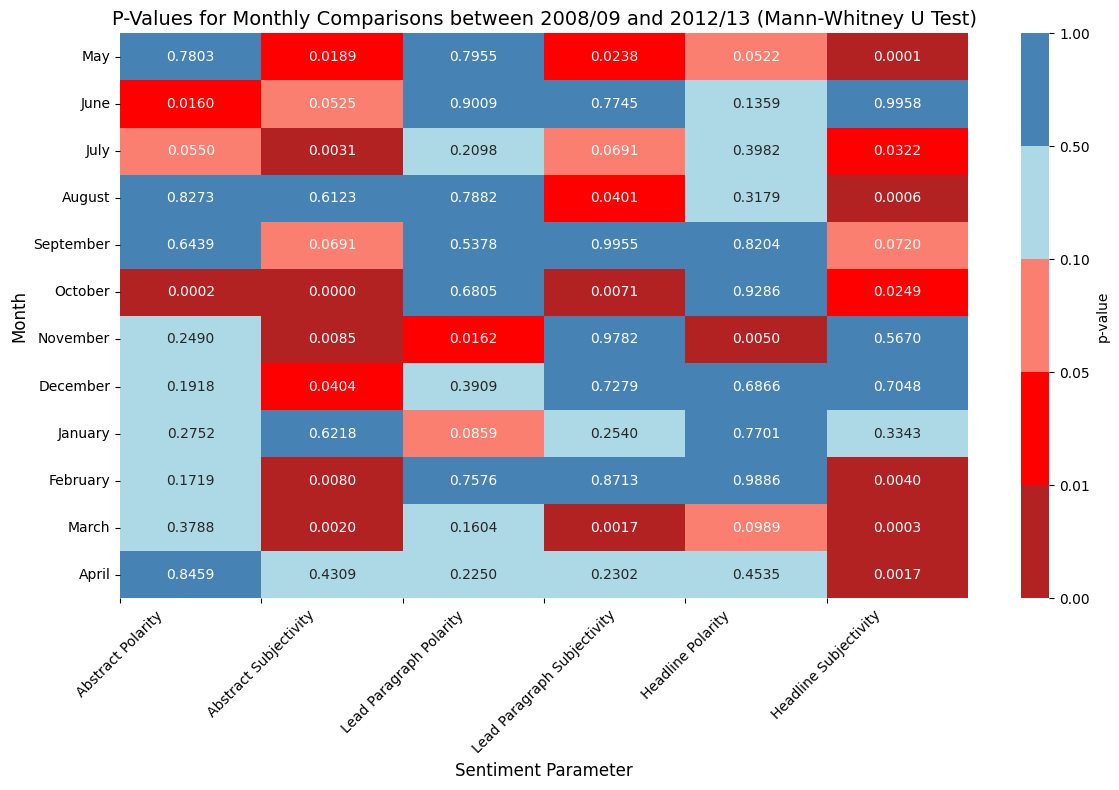

In [83]:
# Defining my own color skale differentiating between the different significance levels for p<0.05 and p<0.01

"""
# Needed packages:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm

"""

# Converting p-values to numeric type
p_values_df = p_values_df.apply(pd.to_numeric)

# labels for the x-axis
labels = [
    'Abstract Polarity',
    'Abstract Subjectivity',
    'Lead Paragraph Polarity',
    'Lead Paragraph Subjectivity',
    'Headline Polarity',
    'Headline Subjectivity'
]

# Defining color bins with specific focus around 0.01 and 0.05 thresholds
bounds = [0, 0.01, 0.05, 0.1, 0.5, 1]
colors = ['firebrick','red', 'salmon', 'lightblue', 'steelblue']
cmap = LinearSegmentedColormap.from_list('cmap', colors)
norm = BoundaryNorm(bounds, cmap.N)

# Plotting the heatmap with the customized colormap and boundaries
plt.figure(figsize=(12, 8))
sns.heatmap(p_values_df, annot=True, cmap=cmap, norm=norm, cbar_kws={'label': 'p-value'}, fmt=".4f")
plt.title('P-Values for Monthly Comparisons between 2008/09 and 2012/13 (Mann-Whitney U Test)', fontsize=14)
plt.xlabel('Sentiment Parameter', fontsize=12)
plt.ylabel('Month', fontsize=12)

# Defining labels for the x-axis
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, fontsize=10)

plt.tight_layout()
plt.savefig(os.path.join(figures_dir, 'heatmap_p-values_MWU_params_08_12.png'))

plt.show()
